In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df =pd.read_csv('D:\PSB Hackathon\HACKATHON_TRAINING_DATA\HACKATHON_TRAINING_DATA.CSV')

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\china\AppData\Local\Temp\ipykernel_43032\4202257358.py:1: SyntaxWarning: invalid escape sequence '\P'
  df =pd.read_csv('D:\PSB Hackathon\HACKATHON_TRAINING_DATA\HACKATHON_TRAINING_DATA.CSV')


<Figure size 640x480 with 0 Axes>

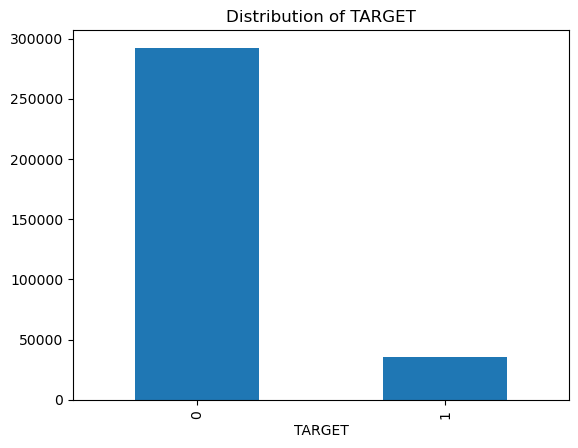

<Figure size 640x480 with 0 Axes>

In [4]:
# plot df['TARGET'].value_counts()
df['TARGET'].value_counts().plot(kind='bar')
plt.title('Distribution of TARGET')
# pie chart of df['TARGET'].value_counts()
plt.figure()

Text(0.5, 1.0, 'Pie Chart of TARGET Distribution')

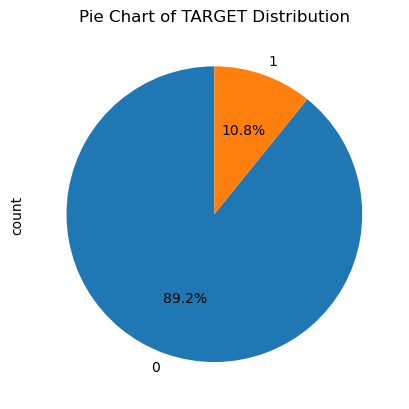

In [5]:
# pie chart of df['TARGET'].value_counts()
df['TARGET'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of TARGET Distribution')   

In [6]:
df.shape

(327741, 139)

In [7]:
df['TARGET'].value_counts()

TARGET
0    292301
1     35440
Name: count, dtype: int64

In [8]:
df_test = pd.read_csv('D:\PSB Hackathon\HACKATHON_TRAINING_DATA\HACKATHON_PREDICTION_DATA.CSV')

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\china\AppData\Local\Temp\ipykernel_43032\1906007400.py:1: SyntaxWarning: invalid escape sequence '\P'
  df_test = pd.read_csv('D:\PSB Hackathon\HACKATHON_TRAINING_DATA\HACKATHON_PREDICTION_DATA.CSV')


In [9]:
# XGBoost version
from xgboost import XGBClassifier 
import xgboost as xgb


In [10]:
xgb.__version__

'3.0.2'

In [11]:
df.head()

,ACCT_AGE,LIMIT,OUTS,ACCT_RESIDUAL_TENURE,LOAN_TENURE,INSTALAMT,SI_FLG,AGE,VINTAGE,KYC_SCR,LOCKER_HLDR_IND,UID_FLG,KYC_FLG,INB_FLG,EKYC_FLG,ONEMNTHCR,ONEMNTHSDR,ONEMNTHOUTSTANGBAL,ONEMNTHAVGMTD,ONEMNTHAVGQTD,ONEMNTHAVGYTD,TWOMNTHSCR,TWOMNTHSDR,TWOMNTHOUTSTANGBAL,TWOMNTHAVGMTD,TWOMNTHAVGQTD,TWOMNTHAVGYTD,THREEMNTHSCR,THREEMNTHSDR,THREEMNTHOUTSTANGBAL,THREEMNTHAVGMTD,THREEMNTHAVGQTD,THREEMNTHAVGYTD,FOURMNTHSCR,FOURMNTHSDR,FOURMNTHOUTSTANGBAL,FOURMNTHAVGMTD,FOURMNTHAVGQTD,FOURMNTHAVGYTD,FIVEMNTHSCR,FIVEMNTHSDR,FIVEMNTHOUTSTANGBAL,FIVEMNTHAVGMTD,FIVEMNTHAVGQTD,FIVEMNTHAVGYTD,SIXMNTHSCR,SIXMNTHSDR,SIXMNTHOUTSTANGBAL,SIXMNTHAVGMTD,SIXMNTHAVGQTD,SIXMNTHAVGYTD,SEVENMNTHSCR,SEVENMNTHSDR,SEVENMNTHOUTSTANGBAL,SEVENMNTHAVGMTD,SEVENMNTHAVGQTD,SEVENMNTHAVGYTD,EIGHTMNTHSCR,EIGHTMNTHSDR,EIGHTMNTHOUTSTANGBAL,EIGHTMNTHAVGMTD,EIGHTMNTHAVGQTD,EIGHTMNTHAVGYTD,NINEMNTHSCR,NINEMNTHSDR,NINEMNTHOUTSTANGBAL,NINEMNTHAVGMTD,NINEMNTHAVGQTD,NINEMNTHAVGYTD,TENMNTHSCR,TENMNTHSDR,TENMNTHOUTSTANGBAL,TENMNTHAVGMTD,TENMNTHAVGQTD,TENMNTHAVGYTD,ELEVENMNTHSCR,ELEVENMNTHSDR,ELEVENMNTHOUTSTANGBAL,ELEVENMNTHAVGMTD,ELEVENMNTHAVGQTD,ELEVENMNTHAVGYTD,TWELVEMNTHSCR,TWELVEMNTHSDR,TWELVEMNTHOUTSTANGBAL,TWELVEMNTHAVGMTD,TWELVEMNTHAVGQTD,TWELVEMNTHAVGYTD,NO_LONS,ALL_LON_LIMIT,ALL_LON_OUTS,ALL_LON_MAX_IRAC,OLDEST_LON_TAKEN,LATEST_LON_TAKEN,LATEST_RESIDUAL_TENURE,OLDEST_RESIDUAL_TENURE,POP_CODE,NO_ENQ,FIRST_NPA_TENURE,CUST_NO_OF_TIMES_NPA,LATEST_NPA_TENURE,NO_YRS_NPA,LATEST_RG3_TENURE,NO_YRS_RG3,TOT_IRAC_CHNG,TIMES_IRAC_SLIP,TIMES_IRAC_UPR,LAST_1_YR_RG4,LAST_3_YR_RG4,LAST_1_YR_RG3,LAST_1_YR_RG2,LAST_1_YR_RG1,CRIFF_11,CRIFF_22,CRIFF_33,CRIFF_44,CRIFF_55,CRIFF_66,TOTAL_CRIFF1,DEC_CRIFFCHNG1,PRI_NO_OF_ACCTS1,PRI_ACTIVE_ACCTS1,PRI_OVERDUE_ACCTS1,PRI_CURRENT_BALANCE1,PRI_SANCTIONED_AMOUNT1,PRI_DISBURSED_AMOUNT1,PRIMARY_INSTAL_AMT1,NEW_ACCTS_IN_LAST_SIX_MONTHS1,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS1,AVERAGE_ACCT_AGE1,CREDIT_HISTORY_LENGTH1,NO_OF_INQUIRIES1,INCOME_BAND1,AGREG_GROUP,PRODUCT_TYPE,LATEST_CR_DAYS,LATEST_DR_DAYS,TIME_PERIOD,TARGET,UNIQUE_ID
0,1.613,1005500.0,494161.89,0.890,914,38513.0,Y,57.663,18.601,110.0,N,Y,Y,Y,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110383.57,-110299.43,91.22,2531.787,2531.787,2531.787,115755.57,-115599.43,108.22,5699.446,4271.143,23172.014,110403.57,-110349.43,53.22,4704.944,3533.186,24788.878,110303.57,-110249.43,100.22,2437.026,2437.026,26692.257,111896.57,-111909.43,147.22,2425.478,7702.299,29426.483,3,1805500.0,527742.24,3,6.136,0.115,-0.216,0.890,2.0,1.0,NaN,NaN,NaN,NaN,0.027,4.0,41,18,21,NaN,NaN,2,11.0,19.0,513.0,NaN,330.0,304.0,303.0,323.0,11.0,3.0,13.0,3.0,3.0,979433.0,1746000.0,1746000.0,52828.0,0.0,0.0,2yrs 9mon,7yrs 6mon,0.0,G,#Total Xpress Credit,PERSONAL LOAN,60.0,45625,NOV24,0,2032
1,1.783,1005500.0,428072.24,0.720,914,38513.0,Y,57.833,18.771,110.0,N,Y,Y,Y,N,217563.57,-217499.43,250.22,2946.575,2946.575,-71259.192,117666.57,-83748.43,287.22,503.123,-29681.911,-79624.206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110383.57,-110299.43,91.22,2531.787,2531.787,2531.787,115755.57,-115599.43,108.22,5699.446,4271.143,23172.014,110403.57,-110349.43,53.22,4704.944,3533.186,24788.878,3,1805500.0,428072.24,3,6.306,0.285,-0.386,0.720,2.0,1.0,NaN,NaN,NaN,NaN,0.030,5.0,40,17,21,NaN,NaN,4,12.0,17.0,513.0,319.0,350.0,NaN,330.0,304.0,11.0,3.0,13.0,3.0,3.0,979433.0,1746000.0,1746000.0,52828.0,0.0,0.0,2yrs 9mon,7yrs 6mon,0.0,G,#Total Xpress Credit,PERSONAL LOAN,28.0,45687,JAN25,0,2033
2,1.698,1005500.0,461364.10,0.805,914,38513.0,Y,57.748,18.686,110.0,N,Y,Y,Y,N,117666.57,-83748.43,287.22,503.123,-29681.911,-79624.206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110383.57,-110299.43,91.2

In [12]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327741 entries, 0 to 327740
Data columns (total 139 columns):
 #    Column                                Dtype  
---   ------                                -----  
 0    ACCT_AGE                              float64
 1    LIMIT                                 float64
 2    OUTS                                  float64
 3    ACCT_RESIDUAL_TENURE                  float64
 4    LOAN_TENURE                           int64  
 5    INSTALAMT                             float64
 6    SI_FLG                                object 
 7    AGE                                   float64
 8    VINTAGE                               float64
 9    KYC_SCR                               float64
 10   LOCKER_HLDR_IND                       object 
 11   UID_FLG                               object 
 12   KYC_FLG                               object 
 13   INB_FLG                               object 
 14   EKYC_FLG                              object 
 15 

In [13]:
# Count nulls and fill rates for each column
null_counts = df.isnull().sum()
fill_rates = (1 - null_counts / len(df)) * 100

# Display as DataFrame for easy viewing
summary = pd.DataFrame({
    'Null Count': null_counts,
    'Fill Rate (%)': fill_rates
})

In [14]:
# df of numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

In [15]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.05, random_state=42)
outlier_pred = iso.fit_predict(df[numerical_cols])
# -1 means outlier, 1 means normal
df_clean = df[outlier_pred == 1]

In [16]:
df=df_clean
df.shape

(311354, 139)

In [17]:
# Convert 'AVERAGE_ACCT_AGE1' from '0yrs 0mons' format to total months as integer
def acct_age_to_months(age_str):
    try:
        yrs, mons = age_str.split('yrs')
        yrs = int(yrs.strip())
        mons = int(mons.replace('mon', '').strip())
        return yrs * 12 + mons
    except Exception:
        return np.nan  # or handle as needed

df['AVERAGE_ACCT_AGE1_MONTHS'] = df['AVERAGE_ACCT_AGE1'].apply(acct_age_to_months)
df['CREDIT_HISTORY_LENGTH1_MONTHS'] = df['CREDIT_HISTORY_LENGTH1'].apply(acct_age_to_months)

In [18]:
df_test['AVERAGE_ACCT_AGE1_MONTHS'] = df_test['AVERAGE_ACCT_AGE1'].apply(acct_age_to_months)
df_test['CREDIT_HISTORY_LENGTH1_MONTHS'] = df_test['CREDIT_HISTORY_LENGTH1'].apply(acct_age_to_months)

In [19]:
df['CREDIT_HISTORY_LENGTH1_MONTHS'].describe()

count    304953.000000
mean         84.273960
std          51.920973
min           0.000000
25%          43.000000
50%          71.000000
75%         115.000000
max         595.000000
Name: CREDIT_HISTORY_LENGTH1_MONTHS, dtype: float64

In [20]:
df.drop(columns=['AVERAGE_ACCT_AGE1', 'CREDIT_HISTORY_LENGTH1'], inplace=True)

In [21]:
df_test.drop(columns=['AVERAGE_ACCT_AGE1', 'CREDIT_HISTORY_LENGTH1'], inplace=True)

In [22]:
# List all categorical columns (object or bool types)
cat_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()
print(cat_cols)

['SI_FLG', 'LOCKER_HLDR_IND', 'UID_FLG', 'KYC_FLG', 'INB_FLG', 'EKYC_FLG', 'INCOME_BAND1', 'AGREG_GROUP', 'PRODUCT_TYPE', 'TIME_PERIOD']


In [23]:
cat_cols = df_test.select_dtypes(include=['object', 'bool']).columns.tolist()
print(cat_cols)

['SI_FLG', 'LOCKER_HLDR_IND', 'UID_FLG', 'KYC_FLG', 'INB_FLG', 'EKYC_FLG', 'INCOME_BAND1', 'AGREG_GROUP', 'PRODUCT_TYPE', 'TIME_PERIOD']


In [24]:
df['KYC_FLG'].value_counts()

KYC_FLG
Y    310427
N       918
1         4
2         3
Name: count, dtype: int64

In [25]:
df_test['KYC_FLG'].value_counts()

KYC_FLG
Y    191326
N       364
1         2
2         1
Name: count, dtype: int64

In [26]:
df.head()

,ACCT_AGE,LIMIT,OUTS,ACCT_RESIDUAL_TENURE,LOAN_TENURE,INSTALAMT,SI_FLG,AGE,VINTAGE,KYC_SCR,LOCKER_HLDR_IND,UID_FLG,KYC_FLG,INB_FLG,EKYC_FLG,ONEMNTHCR,ONEMNTHSDR,ONEMNTHOUTSTANGBAL,ONEMNTHAVGMTD,ONEMNTHAVGQTD,ONEMNTHAVGYTD,TWOMNTHSCR,TWOMNTHSDR,TWOMNTHOUTSTANGBAL,TWOMNTHAVGMTD,TWOMNTHAVGQTD,TWOMNTHAVGYTD,THREEMNTHSCR,THREEMNTHSDR,THREEMNTHOUTSTANGBAL,THREEMNTHAVGMTD,THREEMNTHAVGQTD,THREEMNTHAVGYTD,FOURMNTHSCR,FOURMNTHSDR,FOURMNTHOUTSTANGBAL,FOURMNTHAVGMTD,FOURMNTHAVGQTD,FOURMNTHAVGYTD,FIVEMNTHSCR,FIVEMNTHSDR,FIVEMNTHOUTSTANGBAL,FIVEMNTHAVGMTD,FIVEMNTHAVGQTD,FIVEMNTHAVGYTD,SIXMNTHSCR,SIXMNTHSDR,SIXMNTHOUTSTANGBAL,SIXMNTHAVGMTD,SIXMNTHAVGQTD,SIXMNTHAVGYTD,SEVENMNTHSCR,SEVENMNTHSDR,SEVENMNTHOUTSTANGBAL,SEVENMNTHAVGMTD,SEVENMNTHAVGQTD,SEVENMNTHAVGYTD,EIGHTMNTHSCR,EIGHTMNTHSDR,EIGHTMNTHOUTSTANGBAL,EIGHTMNTHAVGMTD,EIGHTMNTHAVGQTD,EIGHTMNTHAVGYTD,NINEMNTHSCR,NINEMNTHSDR,NINEMNTHOUTSTANGBAL,NINEMNTHAVGMTD,NINEMNTHAVGQTD,NINEMNTHAVGYTD,TENMNTHSCR,TENMNTHSDR,TENMNTHOUTSTANGBAL,TENMNTHAVGMTD,TENMNTHAVGQTD,TENMNTHAVGYTD,ELEVENMNTHSCR,ELEVENMNTHSDR,ELEVENMNTHOUTSTANGBAL,ELEVENMNTHAVGMTD,ELEVENMNTHAVGQTD,ELEVENMNTHAVGYTD,TWELVEMNTHSCR,TWELVEMNTHSDR,TWELVEMNTHOUTSTANGBAL,TWELVEMNTHAVGMTD,TWELVEMNTHAVGQTD,TWELVEMNTHAVGYTD,NO_LONS,ALL_LON_LIMIT,ALL_LON_OUTS,ALL_LON_MAX_IRAC,OLDEST_LON_TAKEN,LATEST_LON_TAKEN,LATEST_RESIDUAL_TENURE,OLDEST_RESIDUAL_TENURE,POP_CODE,NO_ENQ,FIRST_NPA_TENURE,CUST_NO_OF_TIMES_NPA,LATEST_NPA_TENURE,NO_YRS_NPA,LATEST_RG3_TENURE,NO_YRS_RG3,TOT_IRAC_CHNG,TIMES_IRAC_SLIP,TIMES_IRAC_UPR,LAST_1_YR_RG4,LAST_3_YR_RG4,LAST_1_YR_RG3,LAST_1_YR_RG2,LAST_1_YR_RG1,CRIFF_11,CRIFF_22,CRIFF_33,CRIFF_44,CRIFF_55,CRIFF_66,TOTAL_CRIFF1,DEC_CRIFFCHNG1,PRI_NO_OF_ACCTS1,PRI_ACTIVE_ACCTS1,PRI_OVERDUE_ACCTS1,PRI_CURRENT_BALANCE1,PRI_SANCTIONED_AMOUNT1,PRI_DISBURSED_AMOUNT1,PRIMARY_INSTAL_AMT1,NEW_ACCTS_IN_LAST_SIX_MONTHS1,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS1,NO_OF_INQUIRIES1,INCOME_BAND1,AGREG_GROUP,PRODUCT_TYPE,LATEST_CR_DAYS,LATEST_DR_DAYS,TIME_PERIOD,TARGET,UNIQUE_ID,AVERAGE_ACCT_AGE1_MONTHS,CREDIT_HISTORY_LENGTH1_MONTHS
0,1.613,1005500.0,494161.89,0.890,914,38513.0,Y,57.663,18.601,110.0,N,Y,Y,Y,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110383.57,-110299.43,91.22,2531.787,2531.787,2531.787,115755.57,-115599.43,108.22,5699.446,4271.143,23172.014,110403.57,-110349.43,53.22,4704.944,3533.186,24788.878,110303.57,-110249.43,100.22,2437.026,2437.026,26692.257,111896.57,-111909.43,147.22,2425.478,7702.299,29426.483,3,1805500.0,527742.24,3,6.136,0.115,-0.216,0.890,2.0,1.0,NaN,NaN,NaN,NaN,0.027,4.0,41,18,21,NaN,NaN,2,11.0,19.0,513.0,NaN,330.0,304.0,303.0,323.0,11.0,3.0,13.0,3.0,3.0,979433.0,1746000.0,1746000.0,52828.0,0.0,0.0,0.0,G,#Total Xpress Credit,PERSONAL LOAN,60.0,45625,NOV24,0,2032,33.0,90.0
1,1.783,1005500.0,428072.24,0.720,914,38513.0,Y,57.833,18.771,110.0,N,Y,Y,Y,N,217563.57,-217499.43,250.22,2946.575,2946.575,-71259.192,117666.57,-83748.43,287.22,503.123,-29681.911,-79624.206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110383.57,-110299.43,91.22,2531.787,2531.787,2531.787,115755.57,-115599.43,108.22,5699.446,4271.143,23172.014,110403.57,-110349.43,53.22,4704.944,3533.186,24788.878,3,1805500.0,428072.24,3,6.306,0.285,-0.386,0.720,2.0,1.0,NaN,NaN,NaN,NaN,0.030,5.0,40,17,21,NaN,NaN,4,12.0,17.0,513.0,319.0,350.0,NaN,330.0,304.0,11.0,3.0,13.0,3.0,3.0,979433.0,1746000.0,1746000.0,52828.0,0.0,0.0,0.0,G,#Total Xpress Credit,PERSONAL LOAN,28.0,45687,JAN25,0,2033,33.0,90.0
2,1.698,1005500.0,461364.10,0.805,914,38513.0,Y,57.748,18.686,110.0,N,Y,Y,Y,N,117666.57,-83748.43,287.22,503.123,-29681.911,-79624.206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110383.57,-110299.43,91.22,2531

In [27]:
cat_cols

['SI_FLG',
 'LOCKER_HLDR_IND',
 'UID_FLG',
 'KYC_FLG',
 'INB_FLG',
 'EKYC_FLG',
 'INCOME_BAND1',
 'AGREG_GROUP',
 'PRODUCT_TYPE',
 'TIME_PERIOD']

In [28]:
df[df['KYC_FLG']== '1']

,ACCT_AGE,LIMIT,OUTS,ACCT_RESIDUAL_TENURE,LOAN_TENURE,INSTALAMT,SI_FLG,AGE,VINTAGE,KYC_SCR,LOCKER_HLDR_IND,UID_FLG,KYC_FLG,INB_FLG,EKYC_FLG,ONEMNTHCR,ONEMNTHSDR,ONEMNTHOUTSTANGBAL,ONEMNTHAVGMTD,ONEMNTHAVGQTD,ONEMNTHAVGYTD,TWOMNTHSCR,TWOMNTHSDR,TWOMNTHOUTSTANGBAL,TWOMNTHAVGMTD,TWOMNTHAVGQTD,TWOMNTHAVGYTD,THREEMNTHSCR,THREEMNTHSDR,THREEMNTHOUTSTANGBAL,THREEMNTHAVGMTD,THREEMNTHAVGQTD,THREEMNTHAVGYTD,FOURMNTHSCR,FOURMNTHSDR,FOURMNTHOUTSTANGBAL,FOURMNTHAVGMTD,FOURMNTHAVGQTD,FOURMNTHAVGYTD,FIVEMNTHSCR,FIVEMNTHSDR,FIVEMNTHOUTSTANGBAL,FIVEMNTHAVGMTD,FIVEMNTHAVGQTD,FIVEMNTHAVGYTD,SIXMNTHSCR,SIXMNTHSDR,SIXMNTHOUTSTANGBAL,SIXMNTHAVGMTD,SIXMNTHAVGQTD,SIXMNTHAVGYTD,SEVENMNTHSCR,SEVENMNTHSDR,SEVENMNTHOUTSTANGBAL,SEVENMNTHAVGMTD,SEVENMNTHAVGQTD,SEVENMNTHAVGYTD,EIGHTMNTHSCR,EIGHTMNTHSDR,EIGHTMNTHOUTSTANGBAL,EIGHTMNTHAVGMTD,EIGHTMNTHAVGQTD,EIGHTMNTHAVGYTD,NINEMNTHSCR,NINEMNTHSDR,NINEMNTHOUTSTANGBAL,NINEMNTHAVGMTD,NINEMNTHAVGQTD,NINEMNTHAVGYTD,TENMNTHSCR,TENMNTHSDR,TENMNTHOUTSTANGBAL,TENMNTHAVGMTD,TENMNTHAVGQTD,TENMNTHAVGYTD,ELEVENMNTHSCR,ELEVENMNTHSDR,ELEVENMNTHOUTSTANGBAL,ELEVENMNTHAVGMTD,ELEVENMNTHAVGQTD,ELEVENMNTHAVGYTD,TWELVEMNTHSCR,TWELVEMNTHSDR,TWELVEMNTHOUTSTANGBAL,TWELVEMNTHAVGMTD,TWELVEMNTHAVGQTD,TWELVEMNTHAVGYTD,NO_LONS,ALL_LON_LIMIT,ALL_LON_OUTS,ALL_LON_MAX_IRAC,OLDEST_LON_TAKEN,LATEST_LON_TAKEN,LATEST_RESIDUAL_TENURE,OLDEST_RESIDUAL_TENURE,POP_CODE,NO_ENQ,FIRST_NPA_TENURE,CUST_NO_OF_TIMES_NPA,LATEST_NPA_TENURE,NO_YRS_NPA,LATEST_RG3_TENURE,NO_YRS_RG3,TOT_IRAC_CHNG,TIMES_IRAC_SLIP,TIMES_IRAC_UPR,LAST_1_YR_RG4,LAST_3_YR_RG4,LAST_1_YR_RG3,LAST_1_YR_RG2,LAST_1_YR_RG1,CRIFF_11,CRIFF_22,CRIFF_33,CRIFF_44,CRIFF_55,CRIFF_66,TOTAL_CRIFF1,DEC_CRIFFCHNG1,PRI_NO_OF_ACCTS1,PRI_ACTIVE_ACCTS1,PRI_OVERDUE_ACCTS1,PRI_CURRENT_BALANCE1,PRI_SANCTIONED_AMOUNT1,PRI_DISBURSED_AMOUNT1,PRIMARY_INSTAL_AMT1,NEW_ACCTS_IN_LAST_SIX_MONTHS1,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS1,NO_OF_INQUIRIES1,INCOME_BAND1,AGREG_GROUP,PRODUCT_TYPE,LATEST_CR_DAYS,LATEST_DR_DAYS,TIME_PERIOD,TARGET,UNIQUE_ID,AVERAGE_ACCT_AGE1_MONTHS,CREDIT_HISTORY_LENGTH1_MONTHS
155863,6.087,540500.0,196728.22,1.832,2892,8676.0,Y,37.299,15.526,121.0,N,N,1,N,N,0.00,0.0,7942.09,7942.090,7942.090,7885.181,0.00,0.0,7942.09,7942.090,7942.090,7877.203,103.57,0.0,7942.09,7899.69,7892.547,7866.211,0.00,0.0,7889.09,7889.09,7889.09,7859.646,0.00,0.0,7889.09,7889.09,7889.09,7852.164,103.57,0.0,7889.09,7846.69,7839.585,7839.585,0.00,0.0,7836.09,7836.09,7836.090,7836.090,0.00,0.0,7836.09,7836.09,7836.090,7836.090,102.57,0.0,7836.09,7795.832,7788.090,7709.785,0.00,0.0,7784.09,7784.090,7784.090,7701.822,0.00,0.0,7784.09,7784.090,7784.090,7694.025,102.57,0.0,7784.09,7743.832,7736.047,7683.872,1,540500.0,196728.22,3,6.087,6.087,1.832,1.832,1.0,NaN,NaN,NaN,NaN,NaN,0.047,2.0,15,4,10,NaN,NaN,3,5.0,4.0,12.0,NaN,12.0,12.0,549.0,397.0,11.0,4.0,5.0,1.0,0.0,134137.0,535000.0,535000.0,8676.0,0.0,0.0,0.0,G,#Total Auto Loan,AUTO LOAN,92.0,45625,NOV24,0,231169,38.0,77.0
296937,4.507,935500.0,466524.00,2.492,2556,14542.0,Y,51.505,17.380,121.0,N,Y,1,Y,N,0.00,0.0,377.16,377.160,377.160,375.013,0.00,0.0,377.16,377.160,377.160,374.712,52.57,0.0,377.16,375.56,375.290,374.297,0.00,0.0,375.16,375.16,375.16,374.049,0.00,0.0,375.16,375.16,375.16,373.767,52.57,0.0,375.16,373.56,373.292,373.292,0.00,0.0,373.16,373.16,373.160,373.160,0.00,0.0,373.16,373.16,373.160,373.160,52.57,0.0,373.16,371.612,371.314,368.302,0.00,0.0,371.16,371.160,371.160,367.996,0.00,0.0,371.16,371.160,371.160,367.696,52.57,0.0,371.16,369.612,369.312,367.306,1,935500.0,466524.00,3,4.507,4.507,2.492,2.492,3.0,NaN,4.321,1.0,4.321,1.0,0.071,3.0,18,7,10,NaN,NaN,8,8.0,1.0,12.0,12.0,12.0,12.0,401.0,374.0,11.0,2.0,13.0,1.0,1.0,411987.0,930000.0,930000.0,14542.0,0.0,0.0,0.0,H,#Total Auto Loan,AUTO LOAN,28.0,45625,NOV24,0,483418,46.0,83.0
296944,4.677,935500.0,443852.00,2.322,2556,14542.0,Y,51.675,17.549,121.0,N,Y,1,Y,N,0.00,0.0,379.16,379.160,379.160,375.696,52.57,0.0,379.16,377.612,377.312,375.306,0.00,0.0,377.16,377.16,377.160,375.013,0.00,0.0,377.16,377.16,377.16,374.712,5

In [29]:
df['KYC_FLG'] = df['KYC_FLG'].replace({'1': 'Y', '2': 'Y'})

In [30]:
df_test['KYC_FLG'] = df_test['KYC_FLG'].replace({'1': 'Y', '2': 'Y'})

In [31]:
df['KYC_FLG'].value_counts()


KYC_FLG
Y    310434
N       918
Name: count, dtype: int64

In [32]:
cat_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()
cat_cols

['SI_FLG',
 'LOCKER_HLDR_IND',
 'UID_FLG',
 'KYC_FLG',
 'INB_FLG',
 'EKYC_FLG',
 'INCOME_BAND1',
 'AGREG_GROUP',
 'PRODUCT_TYPE',
 'TIME_PERIOD']

In [33]:
cat_cols = df_test.select_dtypes(include=['object', 'bool']).columns.tolist()
cat_cols

['SI_FLG',
 'LOCKER_HLDR_IND',
 'UID_FLG',
 'KYC_FLG',
 'INB_FLG',
 'EKYC_FLG',
 'INCOME_BAND1',
 'AGREG_GROUP',
 'PRODUCT_TYPE',
 'TIME_PERIOD']

In [35]:
binary_cols= ['SI_FLG', 'LOCKER_HLDR_IND', 'UID_FLG', 'KYC_FLG','INB_FLG', 'EKYC_FLG']

In [36]:
for col in binary_cols:
    df[col] = df[col].map({'Y': 1, 'N': 0})

In [37]:
for col in binary_cols:
    df_test[col] = df_test[col].map({'Y': 1, 'N': 0})

In [38]:
multiclass_cols=['INCOME_BAND1','AGREG_GROUP','PRODUCT_TYPE','TIME_PERIOD']

In [39]:
df['INCOME_BAND1'].value_counts()

INCOME_BAND1
F       101774
D        51920
G        48222
E        32772
H        31496
C        18160
EX05     11987
B         8475
EX04        42
EX02        34
A           24
EX01        18
Name: count, dtype: int64

In [40]:
df['INCOME_BAND1'] = df['INCOME_BAND1'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8,'EX01':9, 'EX02': 10,  'EX04': 11, 'EX05': 12})

In [41]:
df_test['INCOME_BAND1'] = df_test['INCOME_BAND1'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8,'EX01':9, 'EX02': 10,  'EX04': 11, 'EX05': 12})

In [42]:
df_test['INCOME_BAND1'].value_counts()

INCOME_BAND1
6.0     64301
4.0     31892
7.0     30607
8.0     20553
5.0     20392
3.0      9533
12.0     6164
2.0      4647
10.0       22
11.0       21
9.0        12
1.0         6
Name: count, dtype: int64

In [43]:
df['INCOME_BAND1'].dtype

dtype('float64')

In [44]:
df_test['AGREG_GROUP'].value_counts()

AGREG_GROUP
#Total Xpress Credit     105358
#Housing Loan             45850
#Total Auto Loan          25718
#Education Loan Total     14767
Name: count, dtype: int64

In [45]:
df['AGREG_GROUP'] = df['AGREG_GROUP'].map({'#Total Xpress Credit': 1, '#Housing Loan':2, '#Total Auto Loan':3,'#Education Loan Total':4})

In [46]:
df_test['AGREG_GROUP'] = df_test['AGREG_GROUP'].map({'#Total Xpress Credit': 1, '#Housing Loan':2, '#Total Auto Loan':3,'#Education Loan Total':4})

In [47]:
df['AGREG_GROUP'].value_counts()

AGREG_GROUP
1    152114
2     88887
3     42055
4     28298
Name: count, dtype: int64

In [48]:
df['PRODUCT_TYPE'].value_counts()

PRODUCT_TYPE
PERSONAL LOAN     152114
HOME LOAN          88887
AUTO LOAN          42055
EDUCATION LOAN     28298
Name: count, dtype: int64

In [49]:
df['PRODUCT_TYPE'] = df['PRODUCT_TYPE'].map({'PERSONAL LOAN': 1, 'HOME LOAN':2, 'AUTO LOAN':3,'EDUCATION LOAN':4})

In [50]:
df_test['PRODUCT_TYPE'] = df_test['PRODUCT_TYPE'].map({'PERSONAL LOAN': 1, 'HOME LOAN':2, 'AUTO LOAN':3,'EDUCATION LOAN':4})

In [51]:
#pearson correlation between product type and agreg group
df_test[['PRODUCT_TYPE', 'AGREG_GROUP']].corr(method='pearson')


,PRODUCT_TYPE,AGREG_GROUP
PRODUCT_TYPE,1.0,1.0
AGREG_GROUP,1.0,1.0


In [52]:
# df.drop(columns=['AGREG_GROUP'], inplace=True)

In [53]:
df['PRODUCT_TYPE'].value_counts()

PRODUCT_TYPE
1    152114
2     88887
3     42055
4     28298
Name: count, dtype: int64

In [54]:
df['TIME_PERIOD'] = df['TIME_PERIOD'].map({'NOV24': 1, 'DEC24': 2, 'JAN25': 3})

In [55]:
df.drop(columns = ['TIME_PERIOD'], inplace = True)

In [56]:
df_test.drop(columns = ['TIME_PERIOD'], inplace = True)

In [57]:
df.shape

(311354, 138)

In [58]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [59]:


# Separate features and target
X = df.drop('TARGET', axis=1)
y = df['TARGET']

# For categorical columns still present, fill missing values and convert to numeric if needed
for col in X.select_dtypes(include=['object', 'bool']).columns:
    X[col] = X[col].fillna('missing')
    X[col] = X[col].astype('category').cat.codes

# Fill numeric missing values
X = X.fillna(X.median())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost classifier
# model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model = XGBClassifier( eval_metric='logloss', scale_pos_weight=(len(y_train[y_train==0]) / len(y_train[y_train==1])))
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.854266030736619
              precision    recall  f1-score   support

           0       0.98      0.86      0.91     55620
           1       0.41      0.83      0.55      6651

    accuracy                           0.85     62271
   macro avg       0.69      0.84      0.73     62271
weighted avg       0.92      0.85      0.87     62271



In [ ]:
import shap
import xgboost
import numpy as np

# Create SHAP explainer
explainer = shap.Explainer(model_resampled)

# Compute SHAP values for the test set
shap_values = explainer(X_test)

# Summary plot (global feature importance)
shap.summary_plot(shap_values, X_test)

# Optional: Force plot for a single prediction
# shap.initjs()
# shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])


c:\Users\china\radioconda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NameError: name 'model_resampled' is not defined

In [ ]:
import numpy as np
import pandas as pd

# If you haven't already:
# explainer = shap.Explainer(model_resampled)
# shap_values = explainer(X_test)

# Convert SHAP values to array if needed
shap_array = np.abs(shap_values.values).mean(axis=0)

# Create DataFrame with feature names and SHAP importance
shap_importance = pd.DataFrame({
    'feature': X_test.columns,
    'mean_abs_shap': shap_array
})

# Sort by importance
shap_importance = shap_importance.sort_values(by='mean_abs_shap', ascending=False)

# Show top 10
print(shap_importance.head(10))


                feature  mean_abs_shap
111            CRIFF_11       1.364618
133      LATEST_DR_DAYS       0.539260
95             POP_CODE       0.384595
17   ONEMNTHOUTSTANGBAL       0.270878
121  PRI_OVERDUE_ACCTS1       0.250166
132      LATEST_CR_DAYS       0.246696
112            CRIFF_22       0.240774
101   LATEST_RG3_TENURE       0.237670
117        TOTAL_CRIFF1       0.219585
130         AGREG_GROUP       0.165124


In [ ]:
df['LAST_1_YR_RG4'].isnull().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

ACCT_AGE                                     0
LIMIT                                        0
OUTS                                         0
ACCT_RESIDUAL_TENURE                        11
LOAN_TENURE                                  0
INSTALAMT                                    0
SI_FLG                                       0
AGE                                          2
VINTAGE                                      2
KYC_SCR                                    417
LOCKER_HLDR_IND                              2
UID_FLG                                      2
KYC_FLG                                      2
INB_FLG                                      2
EKYC_FLG                                     2
ONEMNTHCR                                22805
ONEMNTHSDR                               22805
ONEMNTHOUTSTANGBAL                       22805
ONEMNTHAVGMTD                            22805
ONEMNTHAVGQTD                            22805
ONEMNTHAVGYTD                            22805
TWOMNTHSCR   

In [60]:
# impute null values in NO_YRS_NPA with 0
df['NO_YRS_NPA'] = df['NO_YRS_NPA'].fillna(0)


In [61]:
df_test['NO_YRS_NPA'] = df_test['NO_YRS_NPA'].fillna(0)


In [62]:
df['NO_YRS_RG3'] = df['NO_YRS_RG3'].fillna(0)

In [63]:
df_test['NO_YRS_RG3'] = df_test['NO_YRS_RG3'].fillna(0)

In [64]:
# df with CRIFF_11 nulls inccluded
df_no_null_onemonthcr = df.dropna(subset=['CRIFF_11'])  
df_no_null_onemonthcr['TARGET'].value_counts()

TARGET
0    271987
1     32966
Name: count, dtype: int64

In [65]:
# drop rows with nulls in CRIFF_11
# df.dropna(subset=['CRIFF_11'], inplace=True)    


In [66]:
df.isnull().sum()

ACCT_AGE                                     0
LIMIT                                        0
OUTS                                         0
ACCT_RESIDUAL_TENURE                        11
LOAN_TENURE                                  0
INSTALAMT                                    0
SI_FLG                                       0
AGE                                          2
VINTAGE                                      2
KYC_SCR                                    421
LOCKER_HLDR_IND                              2
UID_FLG                                      2
KYC_FLG                                      2
INB_FLG                                      2
EKYC_FLG                                     2
ONEMNTHCR                                23420
ONEMNTHSDR                               23420
ONEMNTHOUTSTANGBAL                       23420
ONEMNTHAVGMTD                            23420
ONEMNTHAVGQTD                            23420
ONEMNTHAVGYTD                            23420
TWOMNTHSCR   

In [67]:
# TARGET value for not null LAST_1_YR_RG4
null_target_values = df.loc[df["CUST_NO_OF_TIMES_NPA"].isna(), "TARGET"]
null_target_values.value_counts()


TARGET
0    177819
1     24264
Name: count, dtype: int64

In [68]:
df['TARGET'].value_counts()

TARGET
0    278024
1     33330
Name: count, dtype: int64

In [69]:
df['LAST_1_YR_RG4'].fillna(0, inplace=True)
df['LAST_3_YR_RG4'].fillna(0, inplace=True)

C:\Users\china\AppData\Local\Temp\ipykernel_43032\1174220663.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LAST_1_YR_RG4'].fillna(0, inplace=True)
C:\Users\china\AppData\Local\Temp\ipykernel_43032\1174220663.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

In [70]:
df_test['LAST_1_YR_RG4'].fillna(0, inplace=True)
df_test['LAST_3_YR_RG4'].fillna(0, inplace=True)

C:\Users\china\AppData\Local\Temp\ipykernel_43032\3245554036.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['LAST_1_YR_RG4'].fillna(0, inplace=True)
C:\Users\china\AppData\Local\Temp\ipykernel_43032\3245554036.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [71]:
df.isnull().sum()

ACCT_AGE                                     0
LIMIT                                        0
OUTS                                         0
ACCT_RESIDUAL_TENURE                        11
LOAN_TENURE                                  0
INSTALAMT                                    0
SI_FLG                                       0
AGE                                          2
VINTAGE                                      2
KYC_SCR                                    421
LOCKER_HLDR_IND                              2
UID_FLG                                      2
KYC_FLG                                      2
INB_FLG                                      2
EKYC_FLG                                     2
ONEMNTHCR                                23420
ONEMNTHSDR                               23420
ONEMNTHOUTSTANGBAL                       23420
ONEMNTHAVGMTD                            23420
ONEMNTHAVGQTD                            23420
ONEMNTHAVGYTD                            23420
TWOMNTHSCR   

In [72]:
missing_percent = df_test.isnull().mean() * 100
print(missing_percent.sort_values(ascending=False))


FIRST_NPA_TENURE                        70.201311
CUST_NO_OF_TIMES_NPA                    70.201311
LATEST_NPA_TENURE                       70.201311
NO_ENQ                                  63.784280
CRIFF_22                                53.097401
CRIFF_66                                23.264804
CRIFF_55                                23.188119
EIGHTMNTHAVGQTD                          8.540740
EIGHTMNTHOUTSTANGBAL                     8.540740
EIGHTMNTHAVGMTD                          8.540740
EIGHTMNTHAVGYTD                          8.540740
EIGHTMNTHSCR                             8.540740
EIGHTMNTHSDR                             8.540740
TWELVEMNTHAVGQTD                         8.508396
TWELVEMNTHAVGMTD                         8.508396
TWELVEMNTHSCR                            8.508396
TWELVEMNTHSDR                            8.508396
TWELVEMNTHOUTSTANGBAL                    8.508396
TWELVEMNTHAVGYTD                         8.508396
NINEMNTHAVGYTD                           8.481791


In [73]:
df['CUST_NO_OF_TIMES_NPA'].fillna(0, inplace=True)
df['FIRST_NPA_TENURE'].fillna(0, inplace=True)
df['LATEST_NPA_TENURE'].fillna(0, inplace=True)

C:\Users\china\AppData\Local\Temp\ipykernel_43032\3595589772.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CUST_NO_OF_TIMES_NPA'].fillna(0, inplace=True)
C:\Users\china\AppData\Local\Temp\ipykernel_43032\3595589772.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [74]:
df_test['CUST_NO_OF_TIMES_NPA'].fillna(0,inplace=True)
df_test['FIRST_NPA_TENURE'].fillna(0,inplace=True)
df_test['LATEST_NPA_TENURE'].fillna(0,inplace=True)

C:\Users\china\AppData\Local\Temp\ipykernel_43032\1140551812.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['CUST_NO_OF_TIMES_NPA'].fillna(0,inplace=True)
C:\Users\china\AppData\Local\Temp\ipykernel_43032\1140551812.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [75]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from tqdm import tqdm

# Set target column
target_col = 'TARGET'  # change if needed

# Identify numeric columns with <15% missing
num_cols = df.select_dtypes(include=[np.number]).columns.drop(target_col)
missing_ratio = df[num_cols].isnull().mean()
target_cols = missing_ratio[(missing_ratio > 0) & (missing_ratio < 0.15)].index.tolist()

# Dictionaries to save per-class models
imputers = {}
scalers = {}
kmeans_models = {}

# Final output container
final_parts = []

for class_label in df[target_col].unique():
    print(f"Processing class: {class_label}")
    df_class = df[df[target_col] == class_label].copy()

    # Scale numeric data
    scaler = MinMaxScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df_class[num_cols]), columns=num_cols, index=df_class.index)

    # Temporary impute for clustering
    imputer = SimpleImputer(strategy='mean')
    df_temp = pd.DataFrame(imputer.fit_transform(df_scaled), columns=num_cols, index=df_scaled.index)

    # Fit KMeans
    k = 10
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
    clusters = kmeans.fit_predict(df_temp)
    df_scaled['cluster'] = clusters

    # Impute missing values cluster-wise
    df_imputed = df_scaled.copy()
    for col in target_cols:
        for cluster_id in range(k):
            mask = (df_scaled['cluster'] == cluster_id) & (df_scaled[col].isnull())
            mean_val = df_scaled.loc[df_scaled['cluster'] == cluster_id, col].mean()
            df_imputed.loc[mask, col] = mean_val

    # Inverse transform
    df_imputed = df_imputed.drop(columns='cluster')
    df_inverse = pd.DataFrame(scaler.inverse_transform(df_imputed), columns=num_cols, index=df_class.index)

    # Add back non-numeric columns
    for col in df_class.columns:
        if col not in num_cols:
            df_inverse[col] = df_class[col]

    final_parts.append(df_inverse)

    # Save models
    imputers[class_label] = imputer
    scalers[class_label] = scaler
    kmeans_models[class_label] = kmeans

# Final imputed training data
df_train_final = pd.concat(final_parts).sort_index()


Processing class: 0
Processing class: 1


In [76]:
def impute_test(test_df, imputers, scalers, kmeans_models, target_cols, num_cols):
    test_df = test_df.copy()
    imputed_parts = []

    for class_label in imputers.keys():
        scaler = scalers[class_label]
        imputer = imputers[class_label]
        kmeans = kmeans_models[class_label]

        # Scale + impute temporarily
        test_scaled = pd.DataFrame(scaler.transform(test_df[num_cols]), columns=num_cols, index=test_df.index)
        temp = pd.DataFrame(imputer.transform(test_scaled), columns=num_cols, index=test_df.index)

        # Assign clusters
        test_scaled['cluster'] = kmeans.predict(temp)

        # Impute using train cluster-wise means
        test_imputed = test_scaled.copy()
        for col in target_cols:
            for cluster_id in range(kmeans.n_clusters):
                mask = (test_scaled['cluster'] == cluster_id) & (test_scaled[col].isnull())
                mean_val = temp.loc[test_scaled['cluster'] == cluster_id, col].mean()
                test_imputed.loc[mask, col] = mean_val

        test_imputed = test_imputed.drop(columns='cluster')
        test_inverse = pd.DataFrame(scaler.inverse_transform(test_imputed), columns=num_cols, index=test_df.index)

        # Add back non-numeric columns
        for col in test_df.columns:
            if col not in num_cols:
                test_inverse[col] = test_df[col]

        imputed_parts.append(test_inverse)

    # Average imputations from all class models
    df_test_final = pd.concat(imputed_parts).groupby(level=0).mean()
    return df_test_final


In [77]:
df_test_final = impute_test(df_test, imputers, scalers, kmeans_models, target_cols, num_cols)


In [78]:
df_test_final['CUST_NO_OF_TIMES_NPA'].fillna(0,inplace=True)
df_test_final['FIRST_NPA_TENURE'].fillna(0,inplace=True)
df_test_final['LATEST_NPA_TENURE'].fillna(0,inplace=True)

C:\Users\china\AppData\Local\Temp\ipykernel_43032\3155649601.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test_final['CUST_NO_OF_TIMES_NPA'].fillna(0,inplace=True)
C:\Users\china\AppData\Local\Temp\ipykernel_43032\3155649601.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [79]:
df_test_final.isnull().sum()

ACCT_AGE                                     0
LIMIT                                        0
OUTS                                         0
ACCT_RESIDUAL_TENURE                         0
LOAN_TENURE                                  0
INSTALAMT                                    0
SI_FLG                                       0
AGE                                          0
VINTAGE                                      0
KYC_SCR                                      0
LOCKER_HLDR_IND                              0
UID_FLG                                      0
KYC_FLG                                      0
INB_FLG                                      0
EKYC_FLG                                     0
ONEMNTHCR                                    0
ONEMNTHSDR                                   0
ONEMNTHOUTSTANGBAL                           0
ONEMNTHAVGMTD                                0
ONEMNTHAVGQTD                                0
ONEMNTHAVGYTD                                0
TWOMNTHSCR   

In [80]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
from sklearn.utils import compute_class_weight

# Step 1: Define target
target_col = 'TARGET'  # <-- replace this
X = df_train_final.drop(columns=[target_col])
y = df_train_final[target_col]

# Step 2: Handle class imbalance
classes = np.unique(y)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y)
class_weight_dict = dict(zip(classes, class_weights))

# Step 3: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Step 4: Train model with class weights
model = lgb.LGBMClassifier(random_state=42, class_weight=class_weight_dict)
model.fit(X_train, y_train)

# Step 5: Predict & evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


[LightGBM] [Info] Number of positive: 26664, number of negative: 222419
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.054581 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 27762
[LightGBM] [Info] Number of data points in the train set: 249083, number of used features: 137
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000001
[LightGBM] [Info] Start training from score 0.000001
Accuracy: 0.8582004464357406
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91     55605
           1       0.42      0.89      0.57      6666

    accuracy                           0.86     62271
   macro avg       0.70      0.87      0.74     62271
weighted avg       0.92      0.86      0.88     62271



In [81]:
import numpy as np
from sklearn.metrics import f1_score, precision_recall_curve, roc_curve

# Predict probabilities
y_proba = model.predict_proba(X_test)[:, 1]

# Search for best threshold based on F1
thresholds = np.linspace(0.0, 1.0, 200)
f1_scores = [f1_score(y_test, y_proba >= t) for t in thresholds]

best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

print(f"Best Threshold: {best_threshold:.3f}")
print(f"Best F1 Score: {best_f1:.3f}")

# Final predictions using best threshold
y_pred_opt = (y_proba >= best_threshold).astype(int)

# Evaluate
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_opt))
print("Accuracy:", accuracy_score(y_test, y_pred_opt))
print("Classification Report:\n", classification_report(y_test, y_pred_opt))


Best Threshold: 0.774
Best F1 Score: 0.648
Confusion Matrix:
 [[52813  2792]
 [ 2136  4530]]
Accuracy: 0.9208620385090973
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96     55605
           1       0.62      0.68      0.65      6666

    accuracy                           0.92     62271
   macro avg       0.79      0.81      0.80     62271
weighted avg       0.92      0.92      0.92     62271



In [82]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils import compute_class_weight
import numpy as np

# Step 1: Set your target column
target_col = 'TARGET'  # Replace with your actual target
X = df_train_final.drop(columns=[target_col])
y = df_train_final[target_col]

# Step 2: Compute class weights
classes = np.unique(y)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y)
class_weight_dict = dict(zip(classes, weights))

# Step 3: Map weights to training samples
sample_weights = y.map(class_weight_dict)

# Step 4: Split data
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(
    X, y, sample_weights, test_size=0.2, stratify=y, random_state=42
)

# Step 5: Train XGBoost with sample weights
model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train, sample_weight=w_train)

# Step 6: Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


c:\Users\china\radioconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [05:30:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.8810521751698223
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.88      0.93     55605
           1       0.47      0.87      0.61      6666

    accuracy                           0.88     62271
   macro avg       0.73      0.88      0.77     62271
weighted avg       0.93      0.88      0.90     62271



In [83]:
import numpy as np
from sklearn.metrics import f1_score, precision_recall_curve, roc_curve

# Predict probabilities
y_proba = model.predict_proba(X_test)[:, 1]

# Search for best threshold based on F1
thresholds = np.linspace(0.0, 1.0, 200)
f1_scores = [f1_score(y_test, y_proba >= t) for t in thresholds]

best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

print(f"Best Threshold: {best_threshold:.3f}")
print(f"Best F1 Score: {best_f1:.3f}")

# Final predictions using best threshold
y_pred_opt = (y_proba >= best_threshold).astype(int)

# Evaluate
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_opt))
print("Accuracy:", accuracy_score(y_test, y_pred_opt))
print("Classification Report:\n", classification_report(y_test, y_pred_opt))


Best Threshold: 0.764
Best F1 Score: 0.664
Confusion Matrix:
 [[52979  2626]
 [ 2049  4617]]
Accuracy: 0.924924924924925
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96     55605
           1       0.64      0.69      0.66      6666

    accuracy                           0.92     62271
   macro avg       0.80      0.82      0.81     62271
weighted avg       0.93      0.92      0.93     62271



In [ ]:
df_train_final.isnull().sum()

ACCT_AGE                                     0
LIMIT                                        0
OUTS                                         0
ACCT_RESIDUAL_TENURE                         0
LOAN_TENURE                                  0
INSTALAMT                                    0
SI_FLG                                       0
AGE                                          0
VINTAGE                                      0
KYC_SCR                                      0
LOCKER_HLDR_IND                              0
UID_FLG                                      0
KYC_FLG                                      0
INB_FLG                                      0
EKYC_FLG                                     0
ONEMNTHCR                                    0
ONEMNTHSDR                                   0
ONEMNTHOUTSTANGBAL                           0
ONEMNTHAVGMTD                                0
ONEMNTHAVGQTD                                0
ONEMNTHAVGYTD                                0
TWOMNTHSCR   

In [84]:
from catboost import CatBoostClassifier
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights
classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, weights))

cat_model = CatBoostClassifier(verbose=0, random_state=42, class_weights=class_weights)
cat_model.fit(X_train, y_train)
y_pred_proba_cat = cat_model.predict_proba(X_test)[:, 1]

# (Continue with your threshold optimization code)

In [85]:
from sklearn.metrics import f1_score, classification_report, accuracy_score
import numpy as np

# Predict probabilities with CatBoost
y_pred_proba_cat = cat_model.predict_proba(X_test)[:, 1]

best_f1 = 0
best_threshold = 0.5

for threshold in np.arange(0.3, 0.9, 0.05):
    y_pred_custom = (y_pred_proba_cat >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred_custom)
    print(f"Threshold: {threshold:.2f} | F1-score: {f1:.4f}")
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"\nBest threshold: {best_threshold:.2f} with F1-score: {best_f1:.4f}")
y_pred_best = (y_pred_proba_cat >= best_threshold).astype(int)
print("Accuracy (CatBoost, best threshold):", accuracy_score(y_test, y_pred_best))

Threshold: 0.30 | F1-score: 0.5362
Threshold: 0.35 | F1-score: 0.5606
Threshold: 0.40 | F1-score: 0.5825
Threshold: 0.45 | F1-score: 0.6031
Threshold: 0.50 | F1-score: 0.6244
Threshold: 0.55 | F1-score: 0.6425
Threshold: 0.60 | F1-score: 0.6570
Threshold: 0.65 | F1-score: 0.6674
Threshold: 0.70 | F1-score: 0.6738
Threshold: 0.75 | F1-score: 0.6756
Threshold: 0.80 | F1-score: 0.6681
Threshold: 0.85 | F1-score: 0.6433
Threshold: 0.90 | F1-score: 0.5786

Best threshold: 0.75 with F1-score: 0.6756
Accuracy (CatBoost, best threshold): 0.9267877503171621


In [86]:
# classification report
print("Classification Report (CatBoost, best threshold):\n", classification_report(y_test, y_pred_best))

Classification Report (CatBoost, best threshold):
               precision    recall  f1-score   support

           0       0.97      0.95      0.96     55605
           1       0.64      0.71      0.68      6666

    accuracy                           0.93     62271
   macro avg       0.80      0.83      0.82     62271
weighted avg       0.93      0.93      0.93     62271



ROC-AUC Score: 0.9517


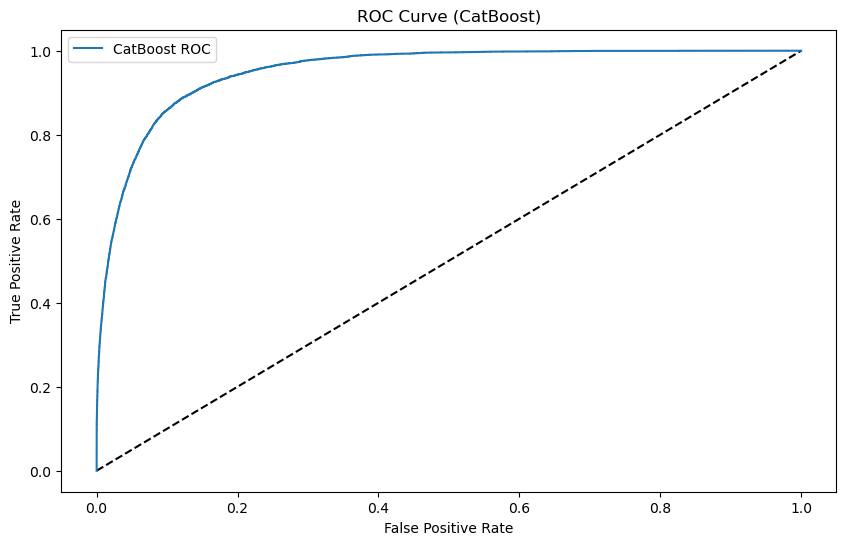

In [90]:
# roc-auc score and plot
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred_proba_cat)
print(f"ROC-AUC Score: {roc_auc:.4f}")
plt.figure(figsize=(10, 6))
plt.plot([0, 1], [0, 1], 'k--') 
plt.plot(*roc_curve(y_test, y_pred_proba_cat)[:2], label='CatBoost ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (CatBoost)')
plt.legend()
plt.show()

In [ ]:
cat_model.save_model("catboost_model.json")


In [ ]:
y_pred = cat_model.predict_proba(df_test_final)[:, 1]


In [ ]:
# set a threshold of .7 to classify as 1
y_pred_final = (y_pred >= 0.7).astype(int)

In [ ]:
# append it to df_test_final
df_test_final['TARGET'] = y_pred_final

In [ ]:
df_test_final['TARGET'].value_counts()

TARGET
0    174262
1     17431
Name: count, dtype: int64

In [ ]:
y_pred_final.shape

(191693,)

In [ ]:
df_submission = pd.read_csv('D:\PSB Hackathon\HACKATHON_TRAINING_DATA\HACKATHON_PREDICTION_DATA.CSV')

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\china\AppData\Local\Temp\ipykernel_19116\537829881.py:1: SyntaxWarning: invalid escape sequence '\P'
  df_submission = pd.read_csv('D:\PSB Hackathon\HACKATHON_TRAINING_DATA\HACKATHON_PREDICTION_DATA.CSV')


In [ ]:
df_submission['TARGET'] = y_pred_final

In [ ]:
df_submission.to_csv('SUBMISSION.csv', index=False)

In [ ]:
df_submission.to_parquet('submission.parquet', index=False)

In [ ]:
# load model
from catboost import CatBoostClassifier
model = CatBoostClassifier()
model.load_model("catboost_model.json")

In [ ]:
model.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'Logloss',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'random_score_type': 'NormalWithModelSizeDecrease',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.1000000015,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.8000000119,
 'use_best_model': False,
 'class_names': [0, 1],
 'random_seed': 42,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'class_weights': [0.5606027842, 4.625222683],
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_ra

In [ ]:
%pip install optuna

   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   -------------- ------------------------- 0.8/2.1 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 2.1/2.1 MB 6.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import optuna
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score

def objective(trial):
    params = {
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.1, log=True),
        'l2_leaf_reg': trial.suggest_int('l2_leaf_reg', 1, 10),
        'iterations': 1000,
        'verbose': 0
    }
    model = CatBoostClassifier(**params)
    return cross_val_score(model, X_train, y_train, cv=3, scoring='roc_auc').mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

print("Best params:", study.best_params)


c:\Users\china\radioconda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-08-02 15:35:41,843] A new study created in memory with name: no-name-c937be2e-a59e-4774-8302-308bfd577fad
[I 2025-08-02 15:36:45,461] Trial 0 finished with value: 0.9001651336863796 and parameters: {'depth': 4, 'learning_rate': 0.02487529352491884, 'l2_leaf_reg': 6}. Best is trial 0 with value: 0.9001651336863796.
[I 2025-08-02 15:38:21,872] Trial 1 finished with value: 0.9094931509233702 and parameters: {'depth': 6, 'learning_rate': 0.045409227625213024, 'l2_leaf_reg': 5}. Best is trial 1 with value: 0.9094931509233702.
[I 2025-08-02 15:39:33,112] Trial 2 finished with value: 0.872534939932228 and parameters: {'depth': 4, 'learning_rate': 0.007836518095832131, 'l2_leaf_reg': 1}. Best is trial 1 with value: 0.9094931509233702.
[I 202

Best params: {'depth': 8, 'learning_rate': 0.056707448124708924, 'l2_leaf_reg': 4}


In [ ]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(
    depth=8,
    learning_rate=0.056707448124708924,
    l2_leaf_reg=4,
    iterations=1000,           # You can adjust this or use early stopping
    eval_metric='F1',         # Or 'F1', 'Accuracy', 'Logloss', etc.
    class_weights=[1, 10],     # Optional: if your data is imbalanced
    verbose=100,
    random_seed=42
)

model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50)


0:	learn: 0.7822737	test: 0.7912378	best: 0.7912378 (0)	total: 73.7ms	remaining: 1m 13s
100:	learn: 0.8476010	test: 0.8427752	best: 0.8430144 (96)	total: 7.25s	remaining: 1m 4s
200:	learn: 0.8626164	test: 0.8510607	best: 0.8510607 (200)	total: 13.8s	remaining: 55s
300:	learn: 0.8771333	test: 0.8601012	best: 0.8601220 (298)	total: 20s	remaining: 46.4s
400:	learn: 0.8874105	test: 0.8632134	best: 0.8636949 (390)	total: 25.9s	remaining: 38.6s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.8643920298
bestIteration = 446

Shrink model to first 447 iterations.


In [ ]:
df_test.shape

(191693, 138)

In [ ]:
# fill rate of df_test
fill_rate =(1- df_test.notnull().mean()) * 100

In [ ]:
fill_rate

ACCT_AGE                                 0.000000
LIMIT                                    0.000000
OUTS                                     0.000000
ACCT_RESIDUAL_TENURE                     0.001043
LOAN_TENURE                              0.000000
INSTALAMT                                0.000000
SI_FLG                                   0.000000
AGE                                      0.000000
VINTAGE                                  0.000000
KYC_SCR                                  0.079815
LOCKER_HLDR_IND                          0.000000
UID_FLG                                  0.000000
KYC_FLG                                  0.000000
INB_FLG                                  0.000000
EKYC_FLG                                 0.000000
ONEMNTHCR                                5.061739
ONEMNTHSDR                               5.061739
ONEMNTHOUTSTANGBAL                       5.061739
ONEMNTHAVGMTD                            5.061739
ONEMNTHAVGQTD                            5.061739
